## 10.2 케라스로 다층 퍼셉트론 구현하기

### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

* MNIST 28*28 픽셀 크기의 패션 아이템 이미지

### 케라스를 사용하여 데이터셋 적재하기

In [1]:
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.4.0'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

### 시퀀셜 API를 사용하여 모델 만들기

In [7]:
model = keras.models.Sequential() # 시퀀셜 모델을 만듦. 가장 간단한 케라스의 신경망 모델
model.add(keras.layers.Flatten(input_shape = [28,28])) 
model.add(keras.layers.Dense(300, activation="relu")) # 뉴런 300개를 가진 Dense 은닉층 추가, Relu 활성화 함수 사용
model.add(keras.layers.Dense(100, activation="relu")) # 뉴런 100개를 가진 Dense 은닉층 추가, Relu 활성화 함수 사용 
model.add(keras.layers.Dense(10, activation="softmax")) 

In [8]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape = [28, 28]),
                                 keras.layers.Dense(300, activation = "relu"),
                                 keras.layers.Dense(100, activation = "relu"),
                                 keras.layers.Dense(10, activation = "softmax")
])

* 모델의 `summary()` 메서드는 모델의 모든 층을 출력한다. 각 층의 이름, 출력 크기, 파라미터 개수, 훈련되는 파라미터와 훈련되지 않은 파라미터를 포함해 전체 파라미터 개수를 출력합니다.
* None은 배치 크기에 어떤 값도 가능하다는 의미이다.

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]

In [12]:
hidden1.name

'dense_3'

In [13]:
weights, biases = hidden1.get_weights() # 층의 파라미터에 접근합니다.

In [14]:
weights # 가중치

array([[-0.04985455, -0.06573171, -0.0389005 , ..., -0.04225386,
        -0.05192358,  0.01888047],
       [ 0.01436833, -0.06516486, -0.01012158, ...,  0.07369456,
         0.01862531,  0.07089001],
       [-0.04503521, -0.01900339,  0.06398165, ...,  0.06934474,
         0.04323845,  0.03710651],
       ...,
       [ 0.02368014, -0.03163559, -0.03532276, ..., -0.02395801,
         0.00863378,  0.0393412 ],
       [ 0.02008379,  0.04285368, -0.06740475, ...,  0.01584639,
         0.02165838, -0.06405371],
       [-0.00959133, -0.00473943, -0.01521541, ...,  0.0089551 ,
        -0.06114738,  0.0177217 ]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases # 편향

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

### 모델 컴파일

In [18]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "sgd", # 기본 확률적 경사 하강법을 사용해 모델 훈련
              metrics = ['accuracy'])

### 모델 훈련과 평가

In [19]:
history = model.fit(X_train, y_train, epochs = 30, # 훈련할 에포크 횟수
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0003 - accuracy: 0.6697 - val_loss: 0.5066 - val_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5043 - accuracy: 0.8239 - val_loss: 0.4505 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4510 - accuracy: 0.8418 - val_loss: 0.4131 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4223 - accuracy: 0.8507 - val_loss: 0.3857 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3992 - accuracy: 0.8607 - val_loss: 0.3901 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3782 - accuracy: 0.8677 - val_loss: 0.3696 - val_accuracy: 0.8750
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3626 - accuracy: 0.8707 - val_loss: 0.3755 - val_accuracy:

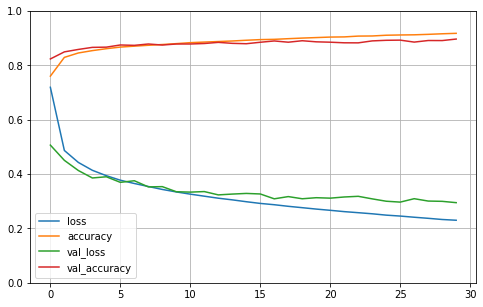

In [20]:
# 학습 곡선 보기
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

* 훈련하는 동안 훈련 정확도와 검증 정확도 꾸준히 상승함.
* 검증 곡선이 훈련 곡선과 가까움 => 과대적합 X

<모델 성능이 만족스럽지 않을 때>
* 처음으로 돌아가서 하이퍼파라미터를 튜닝해야 함. (장 후반부에 기술)


* 배포하기 전 테스트 세트로 모델 평가하기

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.8866


[0.325027734041214, 0.8866000175476074]

### 모델을 사용해 예측을 만들기

* 모델의 `predict()` 메서드를 사용해 새로운 샘플에 대한 예측을 만든다
* MNIST는 새로운 샘플이 없으므로 테스트 세트의 처음 3개 샘플을 사용한다 (다른 것 해봐도 됨)

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

* 첫 번째 이미지는 클래스9(Ankle boot) 확률 96%
* 두 번째 이미지는 클래스2(Pullover)
* 세 번째 이미지는 클래스1(Trouser) 로 분류

* 가장 높은 확률을 가진 클래스만 보고싶을 땐 `predict_clases()` 메서드를 사용한다.

In [23]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [25]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')